OK! Estamos voltando ao nosso conjunto de dados de ciclovias aqui. Fiquei curioso sobre se as pessoas andam de bicicleta mais nos finais de semana ou nos dias de semana?

In [1]:
!wget https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv

--2018-05-02 01:06:06--  https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13807 (13K) [text/plain]
Saving to: ‘bikes.csv.1’

bikes.csv.1         100%[===================>]  13.48K  --.-KB/s    in 0.01s   

2018-05-02 01:06:06 (1.11 MB/s) - ‘bikes.csv.1’ saved [13807/13807]



# Adicionando uma coluna 'dia da semana' ao nosso dataframe

Primeiro, precisamos carregar os dados. Nós fizemos isso antes.

In [0]:
import pandas as pd

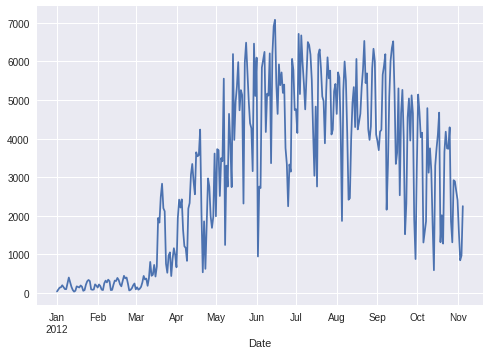

In [5]:
bikes = pd.read_csv('bikes.csv',
                    sep=';',
                    encoding='latin1',
                    parse_dates=['Date'],
                    dayfirst=True,
                    index_col='Date')
bikes['Berri 1'].plot()

Em seguida, vamos apenas olhar para a ciclovia Berri. Berri é uma rua em Montreal, com uma ciclovia muito importante. Eu uso isso principalmente no meu caminho para a biblioteca agora, mas eu costumava levá-lo para o trabalho, por vezes, quando eu trabalhava em Old Montreal.

Então, vamos criar um dataframe com apenas o caminho de Berri nele

In [0]:
berri_bikes = bikes[['Berri 1']].copy()

In [7]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Em seguida, precisamos adicionar uma coluna "dia da semana". Em primeiro lugar, podemos obter o dia da semana a partir do índice. Ainda não falamos sobre índices, mas o índice é o que está à esquerda no dataframe acima, em 'Data'. É basicamente todos os dias do ano.

In [8]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

Você pode ver que na verdade alguns dos dias estão faltando - apenas 310 dias do ano estão realmente lá. Quem sabe porque.

O Pandas tem um monte de funcionalidades de séries temporais realmente boas, então se quisermos obter o dia do mês para cada linha, podemos fazer assim:

In [9]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

Nós realmente queremos o dia da semana, no entanto:

In [10]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

Estes são os dias da semana, onde 0 é segunda-feira. Descobri que 0 era segunda-feira, verificando um calendário.

Agora que sabemos como obter o dia da semana, podemos adicioná-lo como uma coluna em nosso dataframe da seguinte forma:

In [11]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# Adicionando os ciclistas por dia da semana

Isso acaba sendo muito fácil!

Os quadros de dados possuem um método .groupby () semelhante ao SQL groupby, se você estiver familiarizado com isso. Eu não vou explicar mais sobre isso agora - se você quiser saber mais, a documentação é muito boa.

Nesse caso, berri_bikes.groupby ('weekday'). Aggregate (sum) significa "Agrupar as linhas por dia da semana e depois somar todos os valores com o mesmo dia da semana".

In [12]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


É difícil lembrar o que 0, 1, 2, 3, 4, 5, 6 significam, então podemos consertá-lo e representá-lo graficamente:

In [13]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


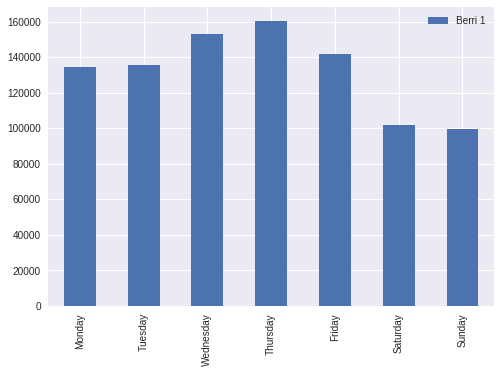

In [14]:
weekday_counts.plot(kind='bar')

Então parece que os Montrealers são ciclistas de passageiros - eles pedalam muito mais durante a semana.